<h1> Day 25 - Class </h1>

## CART Algorithms

CART - Classification And Regression Trees

Used for non linear data. 

Decision trees are the basis for the classification algorithm.

- Classification
    - Decision Tree Classification
    - Random Forest Classification
    - Bagging Classification

- Regression
    - Decision Tree Regression
    - Random Forest Regression
    - Bagging Regression

- Ensemble Models
    - Bagging
    - Boosting
        - ADA Boosting (Adaptive Boosting)
        - Gradient Boosting (GB Boosting)
        - XG Boosting  (Extreme Gradient)
    - Stacking
        - Blended Stacking Bootstrap Aggregation

## Decision Tree Classification

Binary classification problem - When your y variable has only 2 classes.

Multi classification problem - When your y variable has more than 2 classes.

Consider the below dataset, where we are trying to predict a persons EMI repayment capability based on his gender, existing car loan,existing home loan
<img src='img/dt-2.png'/>

When can try to draw a tree as similar to the one in the right. let's try to interpret the tree.

If we consider Gender as the root, 
- we have total 12 people 
    - out of which five people are in '0' category
    - seven people are in '1' category. 

Considering second level as House Loan, 
- out of the five people who belongs to category '0' gender
    - one doesnt have housing loan
    - four has housing loan
    
- out of the seven people who belongs to category '1' gender
    - four doesnt have housing loan
    - three has housing loan
    
and so on .. I believe you got the drift

The maximum level of a tree, will be the number of features available in the dataset. <b> A fully grown tree </b> is a tree with all the columns considered.

Once we have constructed a tree, let's consider a new row for which we have to predict the y value. Take each attribute of the new row and see which path will the new row take to reach a decision. Once you get to the leaf node you can say out of all the people with similar characteristics, 'm' is the probability that he has the capacity to pay the EMI and 'n' is the probability he doesnt not  have the capacity to pay the EMI. i.e. Majority voting applies. In regression problems, we take the mean of the people available.

With fully grown decision trees, one of the major problem is 'Overfitting'. i.e. it works well on test data , but not in train data. i.e. Decision Tree is harder to generalize.

### Pruning
How do we control/restrict the growth of a tree ?  Answer is <b> Pruning </b>

How to Prune ?
- Instead of considering all columns, we can pick important columns that's one way to Prune the data
- On the decision nodes(nodes are called decision nodes), we can put conditions. i.e. create the node only if there are more than 'n' number of observations.

### How to decide which variables to be considered on what level of the tree ?
Imagine a dataset where we have the following, 
- people who likes watching  movies .. let's imagine the distribution as 60 : 40
- people who likes watching games .. let's imagine the distribition as 70 : 30 

Which one would you consider for the root node ? Ofcourse people who likes watching movies, because the tree will be balanced better on both sides with that choice. 

The best split will be when , 
within the split, data has similar characteristics. 
Across splits, data should have different characteristics.

We have to understand a few concepts to find the right split
<b>
<pre>
- Entropy
- GINI Index
- Information Gain
- CHAID
</pre>
</b>

With these 4 ways , we can find the perfect column to start the tree.

i.e. let's imagine x1,x2,x3,x4 and y as the dataset. We find information gain for each variables w.r.t to y

find information gain of x1,y
information gain of x2,y
information gain of x3,y
information gain of x4,y

The field with the maximum information gain can be chosen as the first node

#### Entropy

Entropy is nothing but the measure of disorder. Entropy will be a value between 0 and 1. 

- 0 - means it's a homogeneous mixture (i.e. no disorder or in otherwords, the data is very pure)
- 1 - means it's a heterogeneous mixture (i.e high disorder or in other words, the data is very impure)

The Mathematical formula for Entropy is as follows

<img src='img/entropy-03.png' />

Let’s say we only have two classes , a positive class and a negative class. Therefore ‘i’ here could be either + or (-). So if we had a total of 100 data points in our dataset with 30 belonging to the positive class and 70 belonging to the negative class then ‘P+’ would be 3/10 and ‘P-’ would be 7/10. Pretty straightforward.

If I was to calculate the entropy of my classes in this example using the formula above. Here’s what I would get.

<img src='img/entropy-04.png' />

The entropy here is approximately 0.88. This is considered a high entropy , a high level of disorder ( meaning low level of purity). Entropy is measured between 0 and 1.(Depending on the number of classes in your dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder. For the sake of simplicity, the examples in this blog will have entropy between 0 and 1).

See the image below, when the data set has only +ves, or -ves, entropy is very low, when the data is a 50:50 mix, entropy is at maximum
<img src='img/entropy-05.png' />

#### Information Gain
Now we know how to measure disorder. Next we need a metric to measure the reduction of this disorder in our target variable/class given additional information( features/independent variables) about it. This is where Information Gain comes in. Mathematically it can be written as:
<img src='img/ig-02.png' />

We simply subtract the entropy of Y given X from the entropy of just Y to calculate the reduction of uncertainty about Y given an additional piece of information X about Y. This is called Information Gain. The greater the reduction in this uncertainty, the more information is gained about Y from X.

Let's take an example as shown below, here our target variable is Liability which can take on two values “Normal” and “High” and we only have one feature called Credit Rating which can take on values “Excellent”, “Good” and “Poor”. 
<img src='img/ig-03.png' />

<img src='img/ig-04.png' />

The entropy of our target variable is 1, at maximum disorder due to the even split between class label “Normal” and “High”. Our next step is to calculate the entropy of our target variable Liability given additional information about credit score.

<img src='img/ig-05.png' />

We got the entropy for our target variable given the feature Credit Rating. Now we can compute the Information Gain on Liability from Credit Rating to see how informative this feature is.

<img src='img/ig-06.png' />

Knowing the Credit Rating helped us reduce the uncertainty around our target variable, Liability! Isn’t that what a good feature is supposed to do? Provide us information about our target variable? Well that’s exactly how and why decision trees use entropy and information gain to determine which feature to split their nodes on to get closer to predicting the target variable with each split and also to determine when to stop splitting the tree! ( in addition to hyper-parameters like max depth of course). Let’s see this in action with another example using decision trees.

#### Choosing the important feature out of the available multiple features
Consider an example where we are building a decision tree to predict whether a loan given to a person would result in a write-off or not. Our entire population consists of 30 instances. 16 belong to the write-off class and the other 14 belong to the non-write-off class.

We have two features, namely 
- “Balance” that can take on two values -> “< 50K” or “>50K” and 
- “Residence” that can take on three values -> “OWN”, “RENT” or “OTHER”. 

I’m going to show you how a decision tree algorithm would decide what attribute to split on first and what feature provides more information, or reduces more uncertainty about our target variable out of the two using the concepts of Entropy and Information Gain.

<table>
    <tr>
        <td>
            Feature 1: Balance
        </td>
        <td>
            Feature 2: Residence
        </td>
    </tr>
    <tr>
        <td>
            <img src='img/ig-07.png'/>
        </td>
        <td>
            <img src='img/ig-08.png'/>
        </td>
    </tr>
</table>

Calculation for Feature - 1 (Balance)

<img src='img/ig-09.png'/>

Calculation for Feature - 2 (Residence)

<img src='img/ig-10.png'/>

The information gain from feature, Balance is almost 3 times more than the information gain from Residence! If you go back and take a look at the graphs you can see that the child nodes from splitting on Balance do seem purer than those of Residence. 

However the left most node for residence is also very pure but this is where the weighted averages come in play. Even though that node is very pure, it has the least amount of the total observations and a result contributes a small portion of it’s purity when we calculate the total entropy from splitting on Residence. This is important because we’re looking for overall informative power of a feature and we don’t want our results to be skewed by a rare value in a feature.

 A decision tree algorithm would use this result to make the first split on our data using Balance. From here on, the decision tree algorithm would use this process at every split to decide what feature it is going to split on next. In a real world scenario , with more than two features the first split is made on the most informative feature and then at every split the information gain for each additional feature needs to be recomputed because it would not be the same as the information gain from each feature by itself. The entropy and information gain would have to be calculated after one or more splits have already been made which would change the results. A decision tree would repeat this process as it grows deeper and deeper till either it reaches a pre-defined depth or no additional split can result in a higher information gain beyond a certain threshold which can also usually be specified as a hyper-parameter!

#### Sample Entropy Calcuation

Read the article <a href='https://www.saedsayad.com/decision_tree.htm'>here</a>

a) Entropy using the frequency table of one attribute:

<img src='img/entropy-1.png'/>

Probability of playing golf = 9/14 = 0.64

Probability of not playing golf = 5/14 = 0.36

This is only with respect to one variable, we can also calculate entropy for x1,y | x2,y and so on

b) Entropy using the frequency table of two attributes:

<img src='img/entropy-2.png'/>

Information Gain

IG(X1) = E(Y) - E(Y,X1)
<img src='img/ig-1.png'/> 

The column having the highest information gain can be selected as first level nodes in the tree. For every node of the tree Information Gain calculation is performed (we could see same field appearing again as well)

#### Program for Entropy calculation

First let's calculate entropy for y variable alone (i.e.  "Entropy using the frequency table of one attribute" - formulae 1  in the above)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dataset = df[['survived','sex','who','adult_male','fare']]
dataset

,survived,sex,who,adult_male,fare
0,0,male,man,True,7.2500
1,1,female,woman,False,71.2833
2,1,female,woman,False,7.9250
3,1,female,woman,False,53.1000
4,0,male,man,True,8.0500
...,...,...,...,...,...
886,0,male,man,True,13.0000
887,1,female,woman,False,30.0000
888,0,female,woman,False,23.4500
889,1,male,man,True,30.0000


In [7]:
# Even we can use continous variables, but we convert them to binary
x = []
for i in dataset['fare']:
    if i > dataset['fare'].mean() :
        x.append(1)
    else:
        x.append(0)
dataset['fare'] = x
dataset.isna().sum()

C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


survived      0
sex           0
who           0
adult_male    0
fare          0
dtype: int64

In [8]:
# we can consider y variable as survived
y = dataset['survived']
x = dataset.drop('survived',axis=1)

y.shape, x.shape

((891,), (891, 4))

In [10]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [12]:
probabilites = y.value_counts().values/y.value_counts().sum()
p1 = probabilites[0]
p2 = probabilites[1]
p1,p2

(0.6161616161616161, 0.3838383838383838)

In [13]:
import math
-p1 * math.log(p1,2)-p2 * math.log(p2,2)

# Entropy for y = 0.9607079018756469

0.9607079018756469

<b> Now let's calculate Entropy for E(T,X) i.e. target variable and one of the X variable. Let's consider survived and gender </b>

In [15]:
#E(Survived,Gender)
entropy_x1 = pd.crosstab(df['survived'],df['sex']).T
entropy_x1

survived,0,1
sex,,
female,81,233
male,468,109


In [17]:
entropy_x1.values

array([[ 81, 233],
       [468, 109]], dtype=int64)

In [18]:
# Sum of females, males
entropy_x1.values.sum(axis=1)

array([314, 577], dtype=int64)

In [19]:
# Total sum
entropy_x1.values.sum()

891

In [16]:
# As per the formulae above, 
# E(Survived, Gender) = P(Female) * E(Female) + P(Male) * E(Male)
# E(Survived, Gender) = P(Female) * E(81,233) + P(Male) * E(468,109)
p_female, p_male = entropy_x1.values.sum(axis=1)/entropy_x1.values.sum()
p_female, p_male

(0.35241301907968575, 0.6475869809203143)

In [20]:
entropy_x1.values[0]

array([ 81, 233], dtype=int64)

In [23]:
p_fem_surv0, p_fem_surv1 = entropy_x1.values[0] / entropy_x1.values[0].sum()
p_fem_surv0, p_fem_surv1

(0.25796178343949044, 0.7420382165605095)

In [24]:
entropy_fem = -p_fem_surv0 * math.log(p_fem_surv0,2) - p_fem_surv1 * math.log(p_fem_surv1,2)
entropy_fem

0.8236550739295191

In [26]:
p_male_surv0, p_male_surv1 = entropy_x1.values[1] / entropy_x1.values[1].sum()
p_male_surv0, p_male_surv1

(0.8110918544194108, 0.18890814558058924)

In [27]:
entropy_male = -p_male_surv0 * math.log(p_male_surv0,2) - p_male_surv1 * math.log(p_male_surv1,2)
entropy_male

0.6991817891208407

In [28]:
entropy_survived_gender = p_female * entropy_fem + p_male * entropy_male
entropy_survived_gender

0.7430477952150327

E(Survived, Gender) = 0.7430477952150327

We did this for one X variable, we repease this for all X variables, and pick the X variable with the least 
entropy value

<b> Now let's calculate Entropy for E(Survived,Fare)

In [33]:
#E(Survived,Fare)
entropy_x1 = pd.crosstab(dataset['survived'],dataset['fare']).T
entropy_x1

survived,0,1
fare,,
0,464,216
1,85,126


In [37]:
p_fare0, p_fare1 = entropy_x1.values.sum(axis=1)/entropy_x1.values.sum()
p_fare0, p_fare1

(0.7631874298540965, 0.23681257014590348)

In [46]:
entropy_x1.values[0]

array([464, 216], dtype=int64)

In [47]:
entropy_x1.values[1]

array([ 85, 126], dtype=int64)

In [48]:
p_fare0_surv0,p_fare0_surv1 = entropy_x1.values[0]/entropy_x1.values[0].sum()
p_fare1_surv0,p_fare1_surv1 = entropy_x1.values[1]/entropy_x1.values[1].sum()

In [49]:
e_fare0 = -p_fare0_surv0 * (p_fare0_surv0 * math.log(p_fare0_surv0,2)) - p_fare0_surv1 * (p_fare0_surv1 * math.log(p_fare0_surv1,2))
e_fare0

0.42367834531837956

In [50]:
e_fare1 = -p_fare1_surv0 * (p_fare1_surv0 * math.log(p_fare1_surv0,2)) - p_fare1_surv1 * (p_fare1_surv1 * math.log(p_fare1_surv1,2))
e_fare1

0.4781107068404824

In [51]:
e_surv_fare = p_fare0 * e_fare0 + p_fare1 * e_fare1
e_surv_fare

0.4365686127495397

#### GINI Index

Decision trees recursively split features with regard to their target variable’s “purity”. The entire algorithm is designed to optimize each split on maximizing purity… What is purity? Purity can be thought of as how homogenized the groupings are. You will see in some example below what I mean:

    If we have 4 red gumballs and 0 blue gumballs, that group of 4 is 100% pure, based on color as the target.

    If we have 2 red and 2 blue, that group is 100% impure.

    If we have 3 red and 1 blue, that group is either 75% or 81% pure, if we use Gini or Entropy respectively.
    
GINI index can be used only when we have to do binary splits(2 child nodes for a parent). With information gain we can have more than binary splits. Formula is

<img src='img/gini-02.png'/>

According to Wikipedia, the goal of GINI index is to “measure how often a randomly chosen element from the set would be incorrectly labeled”

let’s go back to the gumball examples. If we decided to arbitrarily label all 4 gumballs as red, how often would one of the gumballs be incorrectly labeled?

<b>4 red and 0 blue:</b>
<img src='img/gini-03.png'/>

A gini score of 0 is the most pure score possible.

The impurity measurement is 0 because we would never incorrectly label any of the 4 red gumballs here. If we arbitrarily chose to label all the balls ‘blue’, then our index would still be 0, because we would always incorrectly label the gumballs.

<b>2 red and 2 blue:</b>
<img src='img/gini-04.png'/>

The impurity measurement is 0.5 because we would incorrectly label gumballs wrong about half the time. Because this index is used in binary target variables (0,1), a gini index of 0.5 is the least pure score possible. Half is one type and half is the other. Dividing gini scores by 0.5 can help intuitively understand what the score represents. 0.5/0.5 = 1, meaning the grouping is as impure as possible (in a group with just 2 outcomes).

Formulae = 1 - (p^2 + q^2)

q is nothing but 1-p

<img src='img/gini-1.png'/>

In [8]:
import random
import pandas as pd
from math import log
#Gini Function
#a and b are the quantities of each class
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

def entropy(base,a,b):
    try:
        var =  abs(((a)/(a+b)) * log(((a)/(a+b)),base)) - (((b)/(a+b)) * log(((b)/(a+b)),base))
        return var
    except (ValueError):
        return 0#Blank lists

#Blank lists
gini_list = []
ent_list = []
blue_list = []
red_list = []
blue_prob_list = []#Looping Gini function on random blue and red float amounts
for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    a_g = gini(red,blue)
    a_e = entropy(2,red,blue)
    b = blue/(blue+red)
    gini_list.append(a_g)
    ent_list.append(a_e)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list.append(b)#Dataframe of amount of blue, red, Probability of blue, and gini score

df = pd.DataFrame({'Blue': blue_list, 'Red': red_list,'Gini Score': gini_list, 'Entropy': ent_list, 'Probability of Blue': blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score','Entropy']]
df

,Red,Blue,Probability of Blue,Gini Score,Entropy
0,0.060102,3.939898,0.984974,0.029600,0.112515
1,1.739830,2.260170,0.565043,0.491539,0.987759
2,3.531620,0.468380,0.117095,0.206768,0.520953
3,1.771062,2.228938,0.557235,0.493448,0.990527
4,1.750494,2.249506,0.562377,0.492218,0.988744
...,...,...,...,...,...
9995,3.423997,0.576003,0.144001,0.246529,0.594622
9996,1.244460,2.755540,0.688885,0.428645,0.894456
9997,0.312357,3.687643,0.921911,0.143983,0.395411
9998,2.078522,1.921478,0.480370,0.499229,0.998888


Text(0.5, 1.0, 'Gini Curve')

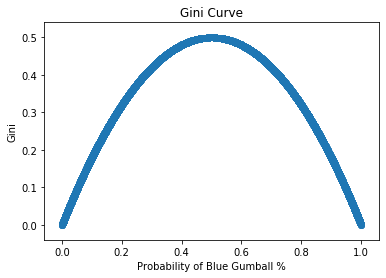

In [9]:
import matplotlib.pyplot as plt
plt.scatter(blue_prob_list,gini_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Gini')
plt.title('Gini Curve')

Text(0.5, 1.0, 'Entropy Curve')

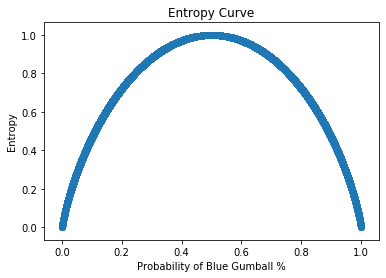

In [10]:
plt.scatter(blue_prob_list,ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

## Random Forest Classification

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

<img src='img/rf-01.jpeg' />

Random forest builds multiple decision trees, 

- each tree uses repeated data from the training set
- each tree also will have random set of features

Consider the below dataset,
<img src='img/dt-3.png' />

We divide the input dataset into multiple samples. In the above dataset, you can see the row r6 is part of all 3 samples. Samples can be taken row level or column level(take x1,x2,x3 and y)

We run decision tree on each of the samples and see how the y variable is classified.

We do majority voting and choose the final prediction as the one said by the majority (for this reason we usually go for odd number of occurrences so that a clear majority comes out)

This technique is called Random Forest. Random Forest is a <b> Bagging </b> technique

Step 1 of the Random Forest model building is to create the bootstrap data set

While picking the data for the models, we choose to avoid picking a few rows , these rows are called out of the bag samples. This OOB samples will be used for testing the models and accuracy will be checked for.

Step 2 Create a decision tree using the bootstrapped dataset, but only use a random subset of variables(columns) at each step

Step 3 We repeat Steps 1 & 2 and build quite a lot of decision trees

Step 4 Use Out of bag data samples to test the accuracy of the model

## Bootstrapping
To understand bootstrap, suppose it were possible to draw repeated samples (of the same size) from the population of interest, a large number of times. Then, one would get a fairly good idea about the sampling distribution of a particular statistic from the collection of its values arising from these repeated samples. The idea behind bootstrap is to use the data of a sample study at hand as a “surrogate population”, for the purpose of approximating the sampling distribution of a statistic; i.e. to resample (with replacement) from the sample data at hand and create a large number of “phantom samples” known as bootstrap samples.
In other words, We randomly sample with replacement from the n known observations. We then call this a bootstrap sample. Since we allow for replacement, this bootstrap sample most likely not identical to our initial sample. Some data points may be duplicated, and others data points from the initial may be omitted in a bootstrap sample.
An Example:
The following numerical example will help to demonstrate how the process works. If we begin with the sample 2, 4, 5, 6, 6, then all of the following are possible bootstrap samples:

    2 ,5, 5, 6, 6
    4, 5, 6, 6, 6
    2, 2, 4, 5, 5
    2, 2, 2, 4, 6
    2, 2, 2, 2, 2
    4, 6, 6, 6, 6

## Bagging Classification

<img src='img/bag-boost.png' /> 

In Bagging we run multiple algorithms parallely and then make a decision from the outputs.

In Boosting, we run multiple algorithms sequentially. Output of first algorithm will be fed as input to the next and so on.

Bagging is an approach to ensemble learning that is based on bootstrapping. In short, given a training set, we produce multiple different training sets (called bootstrap samples), by sampling with replacement from the original dataset. Then, for each bootstrap sample, we build a model. The results in an ensemble of models, where each model votes with the equal weight. Typically, the goal of this procedure is to reduce the variance of the model of interest (e.g. decision trees).

<b> Advantages of Bagging techniques includes </b>

Improving the stability and accuracy of machine learning algorithms used in statistical classification and regression. 

It also reduces variance and helps to avoid overfitting. 

Although it is usually applied to decision tree methods, it can be used with any type of method.

## Recording

https://drive.google.com/drive/folders/14wmJ6qDqLQb63PMVdaGf1QqppjWeZcD_

## References

https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

https://medium.com/datadriveninvestor/tree-algorithms-id3-c4-5-c5-0-and-cart-413387342164